## 머신러닝
# 선형 서포트벡터 머신 (Linear SVM)

- 선형 SVM 은 클래스를 구분하는 분류 문제에서, 각 클래스를 잘 구분하는 직선을 그어주는 방식이다.
- 아래의 그림들을 보면 선형 SVM 이 직관적이라는 것을 알 수 있다. 두 클래스의 가운데 선을 그어주게 된다. 가장 가까이 있는 점들과의 거리가 가장 큰 직선을 찾는다.
- 이때 가장 가까이 있는 점들을 **Support Vector** 라고 하고, 찾은 직선과 서포트벡터 사이의 거리를 **최대 마진(margin)** 이라 한다.
- 결국 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표이다.
- 선형이 아닌 일반적인 SVM 에 대해서는 별도로 다룬다.
- 참고 자료 : https://en.wikipedia.org/wiki/Support_vector_machine

<img src="ch02_07.jpg">
<p style="text-align: center;">(출처 : https://en.wikipedia.org/wiki/Support_vector_machine)</p>
<img src="ch02_08.png">
<p style="text-align: center;">(출처 : http://scikit-learn.org/stable/modules/svm.html)</p>

### 속성 2개, 클래스 2개인 경우
- 아래에서, Iris 데이터에 선형 SVM 을 적용해 보겠다.
- 선형 SVM 은 직선(또는 평면)으로 클래스를 구분한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
from sklearn.model_selection import train_test_split

col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (petal length & petal width)
# y = iris.target
y = iris.target.copy()
y[y==2] = 1 # 타겟값을 setosa(0), others(1) 로 설정

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

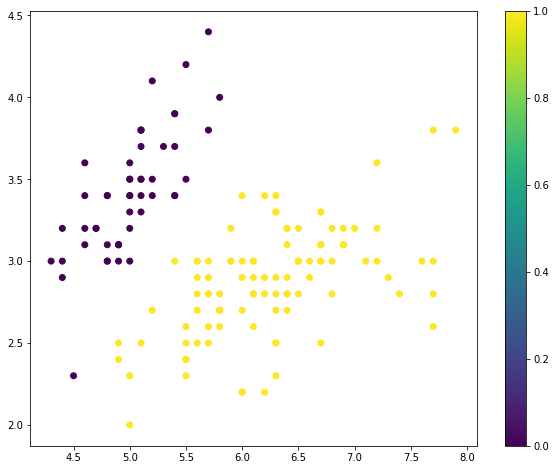

In [4]:
plt.figure(figsize=[10,8])
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [5]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(score)

0.9910714285714286


In [6]:
score = model.score(X_test, y_test)
print(score)

1.0


- 선형 SVM 도 직선을 찾는 것이므로 기울기(가중치)와 절편 값을 결과로 알려준다.

In [11]:
display(model.coef_, model.intercept_)

array([[ 1.40362226, -2.06324919]])

array([-1.14531012])

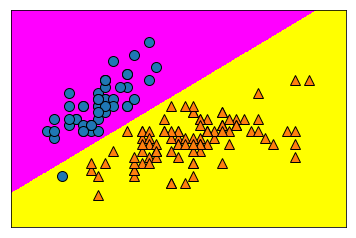

In [10]:
import mglearn

mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

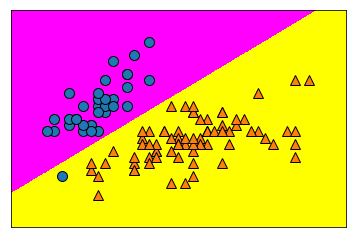

In [12]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

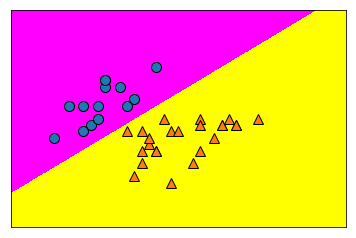

In [13]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

Text(0.5,1,'Linear SVC - Iris')

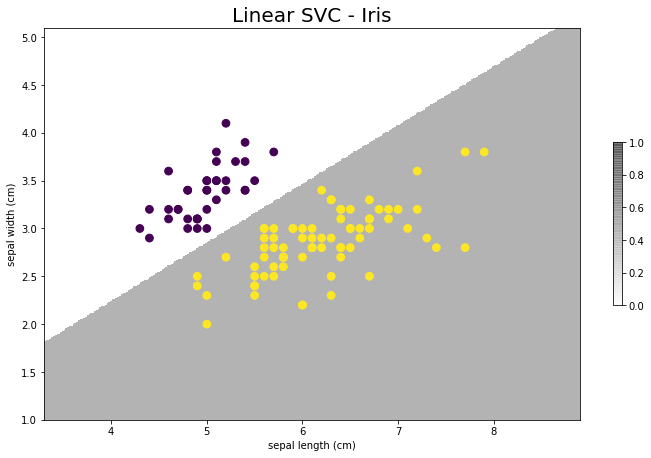

In [7]:
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar(CS, shrink=0.3)
plt.title('Linear SVC - Iris',fontsize=20)

In [82]:
w = model.coef_
b = model.intercept_

display(w, b)

array([[ 0.57313948, -0.31602249]])

array([-2.77512216])

- 선형 SVM 은 평면으로 클래스를 구분하므로 기울기와 편향값을 제공한다.
- 하지만 확률수치를 알 수 있는 model.predict_proba() 는 제공하지 않지만, decision_function() 을 제공한다.
- LinearSVC 는 C 라는 중요한 옵션을 가진다. C 값이 클수록 모델이 훈련데이터에 과대적합 되는 경향이 생긴다. 상세한 설명은 뒤에서 다루겠다.

In [7]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm.classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : string, 'l1' or 'l2' (default='l2')
 |      Specifie

- 테스트 데이터에 적용해 보자.

In [14]:
model.score(X_test, y_test)

1.0

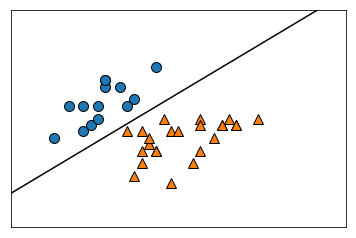

In [15]:
mglearn.plots.plot_2d_separator(model, X_train, eps=0.5)
#mglearn.plots.plot_2d_classification(model, X_train, eps=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

In [16]:
pred_y = model.predict(X_test)

display(y_test, pred_y)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [17]:
X_test[y_test!=pred_y]

array([], shape=(0, 2), dtype=float64)

In [8]:
help(model.decision_function)

Help on method decision_function in module sklearn.linear_model.base:

decision_function(X) method of sklearn.svm.classes.LinearSVC instance
    Predict confidence scores for samples.
    
    The confidence score for a sample is the signed distance of that
    sample to the hyperplane.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.



In [18]:
model.classes_

array([0, 1])

In [19]:
model.decision_function(X_test)

array([-0.92759006,  0.96752908,  1.96911494,  1.0744964 ,  3.60924892,
        3.312128  , -1.29062778,  1.45805938, -1.75954757, -1.78115808,
        2.11821802,  0.62827238,  1.90536865,  1.35109206,  2.03286122,
        1.0744964 , -0.4165345 , -0.69421542,  0.96752908,  1.50019515,
        2.28893163,  3.01283656,  0.73306919,  0.73415444,  2.26732111,
       -1.80168334,  1.09610691,  2.4164242 ,  1.62877298,  3.39639955,
       -0.7363512 ,  1.24521   , -0.97081109,  2.13982854,  1.62877298,
        1.60607721,  1.62877298,  3.09927862])

In [20]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

### 할 일

- 옵션에서 C 값 변경
- 속성 4개와 클래스 3개를 모두 사용
- hard-margin 과 soft-margin 설명 (https://en.wikipedia.org/wiki/Support_vector_machine)

In [18]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1000)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

1.0 1.0


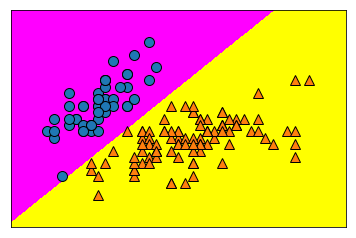

In [19]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

0.9107142857142857 0.8947368421052632


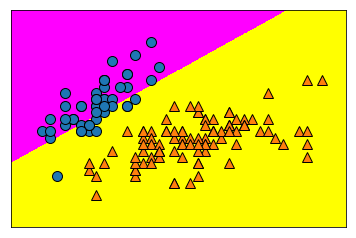

In [7]:
from sklearn.svm import LinearSVC
import mglearn

model = LinearSVC(C=0.01)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 모든 속성과 모든 품종 사용

In [50]:
## import
## iris 불러오기

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=1)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

0.9642857142857143 0.9736842105263158


In [36]:
model.coef_

array([[ 0.18423546,  0.45123392, -0.80794261, -0.45070873],
       [ 0.07250704, -0.84537372,  0.36054727, -0.85327249],
       [-0.74635896, -1.07014355,  1.28057476,  1.69371789]])

In [37]:
model.intercept_

array([ 0.10956014,  1.50384274, -1.32495544])

In [19]:
pred_y = model.predict(X_test)
pred_y

array([0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2])

In [20]:
y_test

array([0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2])

In [21]:
np.where(y_test!=pred_y)

(array([29, 30, 34], dtype=int64),)

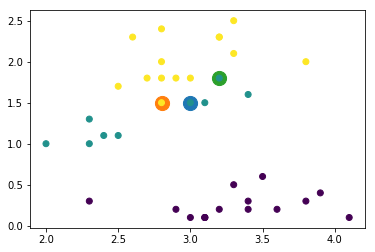

In [22]:
plt.scatter(X_test[29,1], X_test[29,3], s=200)
plt.scatter(X_test[30,1], X_test[30,3], s=200)
plt.scatter(X_test[34,1], X_test[34,3], s=200)

plt.scatter(X_test[:,1], X_test[:,3], c=y_test)

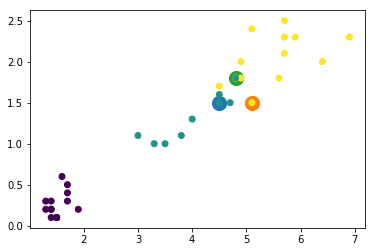

In [23]:
plt.scatter(X_test[29,2], X_test[29,3], s=200)
plt.scatter(X_test[30,2], X_test[30,3], s=200)
plt.scatter(X_test[34,2], X_test[34,3], s=200)


plt.scatter(X_test[:,2], X_test[:,3], c=y_test)

In [22]:
model.decision_function(X_test)

array([[-2.59422346, -0.04669214,  0.61744408],
       [-2.99724233, -0.585568  ,  1.62515039],
       [-1.60776111, -0.70012702, -0.86374625],
       [ 1.43387787, -0.90875446, -6.49913061],
       [ 1.40717818, -0.82318936, -6.49443585],
       [-2.94207596, -0.16863827,  1.17478468],
       [-2.45565384, -0.48702042,  1.18552077],
       [ 1.05377643, -0.45813676, -5.64302357],
       [-1.04470452, -0.4359957 , -1.73973069],
       [-1.37743665,  0.29912718, -1.43412107],
       [-3.13831627,  0.50376609,  0.99439573],
       [-2.1741778 , -0.2783197 ,  0.21155302],
       [-2.54035032, -0.81004225,  1.06004898],
       [ 1.41497524, -0.69076481, -6.39430412],
       [ 1.75288602, -1.72686629, -7.23442966],
       [-2.89909638, -1.02332012,  1.76823241],
       [ 1.68336284, -1.14298935, -6.64545647],
       [-1.47483568,  0.73549264, -1.57353034],
       [ 1.45347584, -0.92503088, -6.70605944],
       [-1.83283484,  0.52082811, -0.86167416],
       [ 1.32648691, -1.17440707, -6.166

### 두 속성과 모든 품종 사용

In [60]:
col1 = 1
col2 = 3

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (sepal width & petal width)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=100)
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print(score_train, score_test)

0.9821428571428571 0.8947368421052632


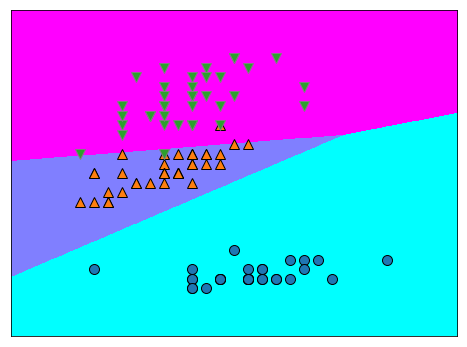

In [61]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='cool')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

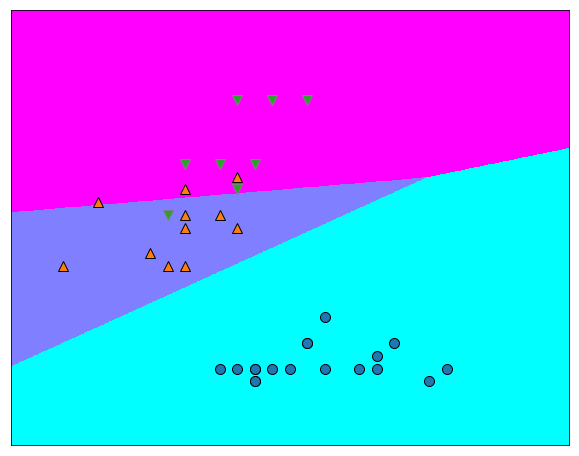

In [62]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='cool')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

### C 값 변경

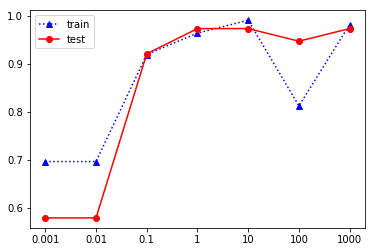

In [88]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

score1 = []
score2 = []
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in Cs:
    model = LinearSVC(C=C)
    model.fit(X_train, y_train)
    s1 = model.score(X_train, y_train)
    s2 = model.score(X_test, y_test)
    score1.append(s1)
    score2.append(s2)
    
plt.plot(score1, 'b^:')
plt.plot(score2, 'ro-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)), Cs)
pass